In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import MatplotlibKeyMap as mk
import os


In [2]:
def InsertOrIncrease(df, type,word):
    if df[type].isin([word]).any():
        df.loc[df[type] == word, 'frequency'] += 1
    else:
        df.loc[len(df)] = [word, 1]

In [3]:
def GeneratengramCSV(filename, n):
    sentence = ''
    df = pd.DataFrame(columns=['ngram', 'frequency'])

    with open(filename+'.txt',encoding='utf-8') as f:
        sentence=f.read()
        # wordList = sentence.split()
        # for word in wordList:
        #     for i in range(len(word)):
        #         curr_ngram = ''
        #         if i+n < len(word):
        #             curr_ngram = word[i:i+n]
        #             InsertOrIncrease(df, 'ngram' ,curr_ngram)
        # sentence = sentence.replace(' ','')
        # print(sentence)
        for i in range(len(sentence)):
            curr_ngram = ''
            consider = True
            if i+n < len(sentence):
                for j in range(n):
                    # print(sentence[i+j],end='')
                    if sentence[i+j] in mk.EnglishAlphabet or sentence[i+j]=='\n' or sentence[i+j]=='\t' or sentence[i+j] in mk.EnglishNumber or sentence[i+j] in mk.SpecialCharacter or sentence[i+j] in mk.EmojiCharacter or sentence[i+j] =='0':
                        consider = False
                        continue
                # print()
                if consider:
                    curr_ngram = sentence[i:i+n]
                    # print(curr_ngram)
                    InsertOrIncrease(df, 'ngram' ,curr_ngram)

    df['probability'] = df['frequency']/df['frequency'].sum()
    
    df = df.sort_values(by=['frequency'], ascending=False)
    
    if not os.path.exists(filename+'/ngram'):
        os.makedirs(filename+'/ngram')

    df.to_csv(f'{filename}/ngram/ngram{n}.csv', index=False)

            

In [4]:
def CalculateEntropy(filename, n):
    df = pd.read_csv(filename)
    entropy=0   
    for i in range(len(df)):
        entropy -= df['probability'][i]*np.log2(df['probability'][i])
    print(f'Entropy of {n} gram is {entropy/n}')
    return entropy/n

In [7]:
filename = 'CombinedFilesNewsArticles'

for i in range(4):
  GeneratengramCSV(filename,1+i)
  print(f'{i} Done')

0 Done
1 Done
2 Done
3 Done


In [ ]:
entropyList = []

for i in range(1,6):
    entropyList.append(CalculateEntropy(f'{filename}/ngram/ngram{i}.csv', i))
    
print(entropyList)

Entropy of 1 gram is 4.674132175319671
Entropy of 2 gram is 4.142508034734292
Entropy of 3 gram is 3.6355141893283562
Entropy of 4 gram is 3.160357778843375
Entropy of 5 gram is 2.7450597094829554
Entropy of 6 gram is 2.405566952639561
Entropy of 7 gram is 2.1270575362033033
Entropy of 8 gram is 1.8973694631689713
Entropy of 9 gram is 1.7071941801319461
Entropy of 10 gram is 1.5481917261032883
Entropy of 11 gram is 1.4140545853036202
Entropy of 12 gram is 1.2995138173535226
Entropy of 13 gram is 1.200723744162371
Entropy of 14 gram is 1.115142752356461
Entropy of 15 gram is 1.0401756003989162
Entropy of 16 gram is 0.9741980680745341
Entropy of 17 gram is 0.9156949170010891
Entropy of 18 gram is 0.8634599542582319
Entropy of 19 gram is 0.8165376895939751
Entropy of 20 gram is 0.7741847502585231
Entropy of 21 gram is 0.7358079176838663
Entropy of 22 gram is 0.7008467821237283
Entropy of 23 gram is 0.6688770778330609
Entropy of 24 gram is 0.6395346547419158
Entropy of 25 gram is 0.6125081

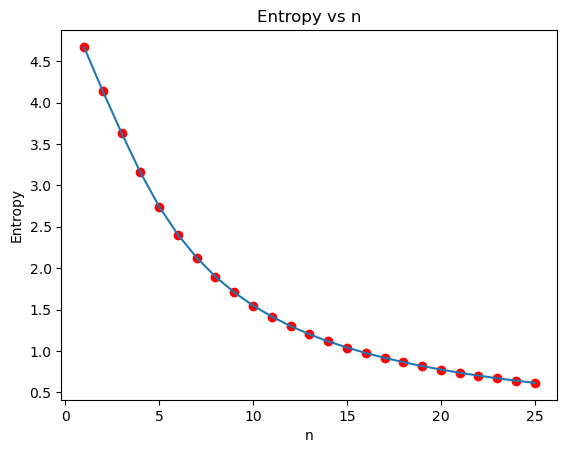

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure()

x = np.arange(1,len(entropyList)+1)

plt.scatter(x, entropyList, marker='o', color='red')
plt.plot(x, entropyList)
plt.xlabel('n')
plt.ylabel('Entropy')
plt.title('Entropy vs n')
plt.show()
plt.savefig(f'{filename}/EntropyVsN.png')

         

In [ ]:
def GenerateRedundancy(entropy):
    Rl=1-entropy/np.log2(60)
    return Rl

In [ ]:
for i in range(1,len(entropyList)+1):
    print(f'Redundancy of {i} gram is {GenerateRedundancy(entropyList[i-1])}')

Redundancy of 1 gram is 0.20869836682015797
Redundancy of 2 gram is 0.2986990417912866
Redundancy of 3 gram is 0.3845299603092054
Redundancy of 4 gram is 0.4649709982451774
Redundancy of 5 gram is 0.5352783896956257
Redundancy of 6 gram is 0.5927524111538512
Redundancy of 7 gram is 0.6399023307144599
Redundancy of 8 gram is 0.678787099158469
Redundancy of 9 gram is 0.7109825969349829
Redundancy of 10 gram is 0.7379007277950447
Redundancy of 11 gram is 0.7606093151014343
Redundancy of 12 gram is 0.7800003578329948
Redundancy of 13 gram is 0.7967249054764871
Redundancy of 14 gram is 0.8112132374373897
Redundancy of 15 gram is 0.8239047120371189
Redundancy of 16 gram is 0.8350742997002852
Redundancy of 17 gram is 0.8449785209020355
Redundancy of 18 gram is 0.8538215766345543
Redundancy of 19 gram is 0.8617652254807241
Redundancy of 20 gram is 0.8689353158438229
Redundancy of 21 gram is 0.8754322759539676
Redundancy of 22 gram is 0.8813509797109205
Redundancy of 23 gram is 0.88676325267809

In [10]:
# implement the function to calculate the entropy of a given n-gram

def Calculate(n):
    
    df_currgram = pd.read_csv(f'{filename}/ngram/ngram{n}.csv')
    entropy_sum = 0
    
    for i in range(len(df_currgram)):
        # print(f'{df_currgram["ngram"][i]} {df_currgram["probability"][i]}')       
        entropy_sum -= df_currgram['probability'][i]*np.log2(df_currgram['probability'][i])
    # print(f'Entropy of {n} gram is {entropy_sum}')
    return entropy_sum

In [12]:
entropyList = []
prev_entropy = 0
for i in range(1,4):   
    entropyn = Calculate(i)
    entropyList.append(entropyn-prev_entropy)
    prev_entropy = entropyn
print(entropyList)



[4.696349462414696, 3.6427976335355527, 2.806302795078727]


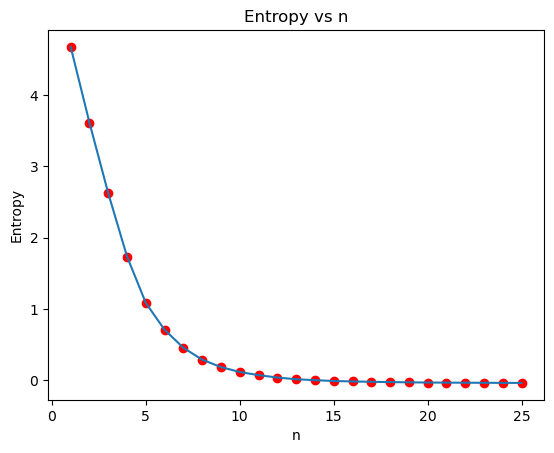

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure()

x = np.arange(1,len(entropyList)+1)

plt.scatter(x, entropyList, marker='o', color='red')
plt.plot(x, entropyList)
plt.xlabel('n')
plt.ylabel('Entropy')
plt.title('Entropy vs n')
plt.show()

plt.savefig(f'{filename}/EntropyVsN.png')

In [14]:
print(np.log2(60))

5.906890595608519
